In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:
df = pd.read_csv('data.csv')

In [40]:
df.shape

(576, 21)

In [41]:
df_n = df.drop(['Furniture_n','Price','URL','Thumbnail','Title','Name','Address Origin','Address','Description','Has Media','Featured','Market Center','Payment Currency','Contact Stage','Property Type','Furniture','Lease End Date'],axis=1)

In [42]:
from sklearn.preprocessing import LabelEncoder
lb_furniture = LabelEncoder()
df_n['Furniture_n'] = lb_furniture.fit_transform(df['Furniture'])
#df_n['PropertyType_n'] = lb_furniture.fit_transform(df['Property Type'])
df_n.head()

,Number of Bedrooms,Number of Bathrooms,Area,SalesPrice,Furniture_n
0,2.0,2.0,59.0,2.88,0
1,4.0,4.0,145.0,3.90,0
2,2.0,2.0,89.0,8.10,2
3,1.0,1.0,50.0,4.40,2
4,2.0,2.0,76.0,4.20,2


In [43]:
data = df_n[['Number of Bedrooms','Number of Bathrooms','Area','Furniture_n','SalesPrice']]

In [44]:
data.shape

(576, 5)

In [45]:
data.dropna(inplace=True)

C:\Users\Win\AppData\Local\Temp\ipykernel_16820\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [46]:
data

,Number of Bedrooms,Number of Bathrooms,Area,Furniture_n,SalesPrice
0,2.0,2.0,59.00,0,2.88
1,4.0,4.0,145.00,0,3.90
2,2.0,2.0,89.00,2,8.10
3,1.0,1.0,50.00,2,4.40
4,2.0,2.0,76.00,2,4.20
...,...,...,...,...,...
571,3.0,3.0,100.35,1,4.62
572,3.0,3.0,104.03,1,4.18
573,3.0,2.0,99.00,2,5.20
574,2.0,2.0,68.00,1,3.23


In [47]:
# Normalize the data
#sc = MinMaxScaler()
#data_sc = sc.fit_transform(data)

In [48]:
feature_cols = ['Number of Bedrooms','Number of Bathrooms','Area','Furniture_n','SalesPrice']
X = data[feature_cols] # Features
Y = data.SalesPrice # Target variable

X = data.drop(['SalesPrice'],axis=1)
Y = data['SalesPrice'].values.reshape(-1, 1)

print("Shape of X:",X.shape)
print("Shape of Y:",Y.shape)

Shape of X: (568, 4)
Shape of Y: (568, 1)


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
y_pred = regressor.predict(X_test)
y_pred

array([ 3.5       ,  7.2       ,  2.11      ,  4.25      ,  5.65      ,
        7.        ,  4.7       ,  3.9       ,  2.575     ,  8.1       ,
        3.15555556,  3.882     , 15.        ,  2.55      ,  3.90333333,
        4.25      ,  2.228     , 19.5       ,  4.35      ,  3.494     ,
        4.65      ,  9.        ,  7.2       ,  4.75      ,  6.2       ,
        5.7       ,  6.        ,  2.725     ,  1.45      ,  2.83333333,
        6.43333333,  7.78      ,  3.1       ,  3.1       ,  6.84      ,
        3.2       ,  3.6       ,  2.83333333,  3.8       ,  2.59      ,
        8.8       ,  6.84      ,  4.9       ,  3.90333333,  3.9       ,
       11.8       ,  2.775     ,  2.        ,  6.43333333,  2.725     ,
        5.25      ,  3.5       ,  3.        ,  2.87      ,  3.        ,
        4.65      ,  4.8       , 16.        ,  1.6       ,  2.5       ,
        4.9       ,  2.83333333,  9.9       ,  4.1       ,  7.455     ,
        7.925     ,  1.7       ,  8.8       ,  7.5       ,  5.55

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.15184316805032105

Text(0.5, 1.0, 'Actual vs Predicted')

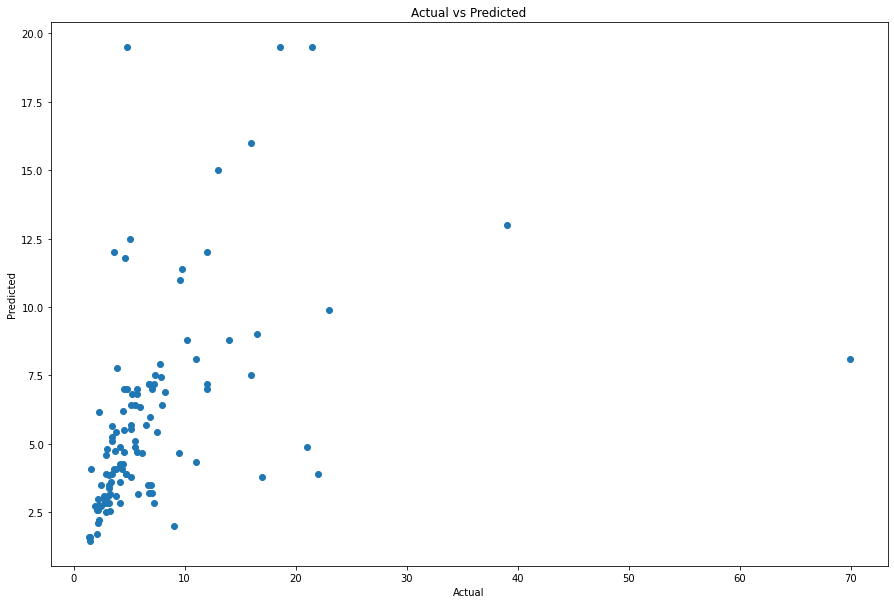

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')

In [54]:
y_train = pd.DataFrame(y_train)
y_train

,0
0,10.70
1,11.20
2,4.80
3,4.25
4,3.10
...,...
449,24.00
450,2.50
451,2.10
452,4.80


In [36]:
data_train = X_train.join(y_train)
data_train.dropna()

,Number of Bedrooms,Number of Bathrooms,Area,Furniture_n,0
342,2.0,2.0,98.34,2,2.59
434,3.0,2.0,113.50,2,3.70
411,2.0,2.0,74.50,0,11.60
96,2.0,2.0,68.50,0,4.50
389,2.0,2.0,78.50,0,3.35
...,...,...,...,...,...
70,1.0,1.0,51.70,0,16.00
278,4.0,3.0,187.00,2,2.65
9,2.0,2.0,70.00,0,4.65
363,2.0,1.0,59.00,0,6.50


array([[<Axes: title={'center': 'Number of Bedrooms'}>,
        <Axes: title={'center': 'Number of Bathrooms'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Furniture_n'}>],
       [<Axes: title={'center': '0'}>, <Axes: >]], dtype=object)

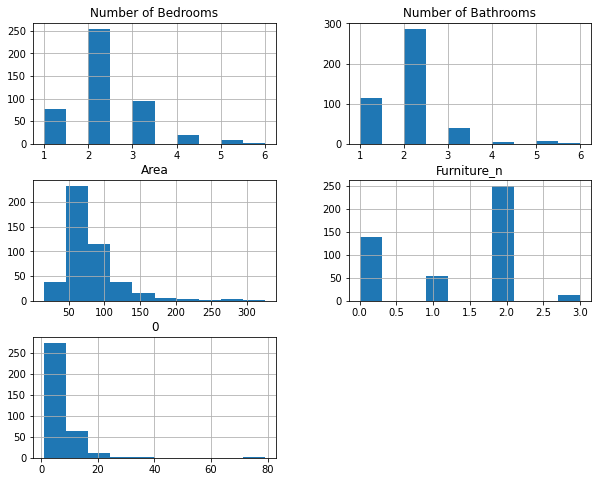

In [37]:
data_train.hist(figsize=(10,8))